#Notes and Refrences

This document explores a general process for loading, filtering, dimention reduction and clustering using PCA and K-means.

Evalutation is done with distence calculations and silhoutte analysis

See: 

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a


Drachen, A., Sifa, R., Bauckhage, C., & Thurau, C. (2012). Guns, swords and data: Clustering of player behavior in computer games in the wild. 2012 IEEE Conference on Computational Intelligence and Games (CIG), 163–170. https://doi.org/10.1109/CIG.2012.6374152


## Read in everything

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
from math import ceil
import numpy as np
pd.options.display.max_columns = 1000
from google.colab import files
import urllib.request
from zipfile import ZipFile
from io import BytesIO

Open proc_zip from url as a dataframe

In [0]:
proc_zip_url = 'https://github.com/fielddaylab/opengamedata/blob/master/jupyter/lakeland_data/LAKELAND_20191201_to_20191231_b2cf46d_proc.zip?raw=true'
resp = urllib.request.urlopen(proc_zip_url)
zipfile = ZipFile(BytesIO(resp.read()))
with zipfile.open(zipfile.namelist()[0]) as f:
    df = pd.read_csv(f)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1599) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print(df.shape)
df.head()

(17116, 1600)


,lvl0_EventCount,lvl1_EventCount,lvl2_EventCount,lvl3_EventCount,lvl4_EventCount,lvl5_EventCount,lvl6_EventCount,lvl7_EventCount,lvl8_EventCount,lvl9_EventCount,lvl0_ActiveEventCount,lvl1_ActiveEventCount,lvl2_ActiveEventCount,lvl3_ActiveEventCount,lvl4_ActiveEventCount,lvl5_ActiveEventCount,lvl6_ActiveEventCount,lvl7_ActiveEventCount,lvl8_ActiveEventCount,lvl9_ActiveEventCount,lvl0_durationInSecs,lvl1_durationInSecs,lvl2_durationInSecs,lvl3_durationInSecs,lvl4_durationInSecs,lvl5_durationInSecs,lvl6_durationInSecs,lvl7_durationInSecs,lvl8_durationInSecs,lvl9_durationInSecs,lvl0_count_gamestate_logs,lvl1_count_gamestate_logs,lvl2_count_gamestate_logs,lvl3_count_gamestate_logs,lvl4_count_gamestate_logs,lvl5_count_gamestate_logs,lvl6_count_gamestate_logs,lvl7_count_gamestate_logs,lvl8_count_gamestate_logs,lvl9_count_gamestate_logs,lvl0_count_achievements,lvl1_count_achievements,lvl2_count_achievements,lvl3_count_achievements,lvl4_count_achievements,lvl5_count_achievements,lvl6_count_achievements,lvl7_count_achievements,lvl8_count_achievements,lvl9_count_achievements,lvl0_count_buy_home,lvl1_count_buy_home,lvl2_count_buy_home,lvl3_count_buy_home,lvl4_count_buy_home,lvl5_count_buy_home,lvl6_count_buy_home,lvl7_count_buy_home,lvl8_count_buy_home,lvl9_count_buy_home,lvl0_count_buy_food,lvl1_count_buy_food,lvl2_count_buy_food,lvl3_count_buy_food,lvl4_count_buy_food,lvl5_count_buy_food,lvl6_count_buy_food,lvl7_count_buy_food,lvl8_count_buy_food,lvl9_count_buy_food,lvl0_count_buy_farm,lvl1_count_buy_farm,lvl2_count_buy_farm,lvl3_count_buy_farm,lvl4_count_buy_farm,lvl5_count_buy_farm,lvl6_count_buy_farm,lvl7_count_buy_farm,lvl8_count_buy_farm,lvl9_count_buy_farm,lvl0_count_buy_fertilizer,lvl1_count_buy_fertilizer,lvl2_count_buy_fertilizer,lvl3_count_buy_fertilizer,lvl4_count_buy_fertilizer,lvl5_count_buy_fertilizer,lvl6_count_buy_fertilizer,lvl7_count_buy_fertilizer,lvl8_count_buy_fertilizer,lvl9_count_buy_fertilizer,lvl0_count_buy_livestock,lvl1_count_buy_livestock,lvl2_count_buy_livestock,lvl3_count_buy_livestock,lvl4_count_buy_livestock,lvl5_count_buy_livestock,lvl6_count_buy_livestock,lvl7_count_buy_livestock,lvl8_count_buy_livestock,lvl9_count_buy_livestock,lvl0_count_buy_skimmer,lvl1_count_buy_skimmer,lvl2_count_buy_skimmer,lvl3_count_buy_skimmer,lvl4_count_buy_skimmer,lvl5_count_buy_skimmer,lvl6_count_buy_skimmer,lvl7_count_buy_skimmer,lvl8_count_buy_skimmer,lvl9_count_buy_skimmer,lvl0_count_buy_sign,lvl1_count_buy_sign,lvl2_count_buy_sign,lvl3_count_buy_sign,lvl4_count_buy_sign,lvl5_count_buy_sign,lvl6_count_buy_sign,lvl7_count_buy_sign,lvl8_count_buy_sign,lvl9_count_buy_sign,lvl0_count_buy_road,lvl1_count_buy_road,lvl2_count_buy_road,lvl3_count_buy_road,lvl4_count_buy_road,lvl5_count_buy_road,lvl6_count_buy_road,lvl7_count_buy_road,lvl8_count_buy_road,lvl9_count_buy_road,lvl0_money_spent,lvl1_money_spent,lvl2_money_spent,lvl3_money_spent,lvl4_money_spent,lvl5_money_spent,lvl6_money_spent,lvl7_money_spent,lvl8_money_spent,lvl9_money_spent,lvl0_money_spent_home,lvl1_money_spent_home,lvl2_money_spent_home,lvl3_money_spent_home,lvl4_money_spent_home,lvl5_money_spent_home,lvl6_money_spent_home,lvl7_money_spent_home,lvl8_money_spent_home,lvl9_money_spent_home,lvl0_money_spent_food,lvl1_money_spent_food,lvl2_money_spent_food,lvl3_money_spent_food,lvl4_money_spent_food,lvl5_money_spent_food,lvl6_money_spent_food,lvl7_money_spent_food,lvl8_money_spent_food,lvl9_money_spent_food,lvl0_money_spent_farm,lvl1_money_spent_farm,lvl2_money_spent_farm,lvl3_money_spent_farm,lvl4_money_spent_farm,lvl5_money_spent_farm,lvl6_money_spent_farm,lvl7_money_spent_farm,lvl8_money_spent_farm,lvl9_money_spent_farm,lvl0_money_spent_fertilizer,lvl1_money_spent_fertilizer,lvl2_money_spent_fertilizer,lvl3_money_spent_fertilizer,lvl4_money_spent_fertilizer,lvl5_money_spent_fertilizer,lvl6_money_spent_fertilizer,lvl7_money_spent_fertilizer,lvl8_money_spent_fertilizer,lvl9_money_spent_fertilizer,lvl0_money_spent_livestock,lvl1_money_spent_livestock,lvl2_money_spen

## Filtering
- Filtered out the sessions that used SPYPARTY (debug=1)
- Filtered any sessions that were not between 600 seconds (10 min) and 3600 seconds (60 min)
- Filtered out continues
- Filtered out any sessions that did not have at least 3 active events in lvl0 and 10 in the session

In [0]:
df = df[df['debug'] < 1]
#df = df[df['continue'] > 0]
#df = df[df['num_play'] == 2]
df = df[(300 < df['sessDuration']) & (df['sessDuration'] < 3600)]
df = df[df['lvl5_ActiveEventCount'] > 2]
df = df[df['sess_ActiveEventCount'] > 9]
df

lvl0_EventCount  lvl1_EventCount  lvl2_EventCount  lvl3_EventCount  \
0                  133            181.0             81.0              NaN   
1                   91            172.0             56.0              NaN   
3                  118            183.0            156.0              NaN   
6                  476            194.0              NaN              NaN   
7                   69             76.0             88.0             74.0   
...                ...              ...              ...              ...   
17091               95             55.0             19.0              NaN   
17092               88            100.0             91.0             84.0   
17096              178            132.0              NaN              NaN   
17103              325            101.0              NaN              NaN   
17110               56             61.0            113.0            106.0   

       lvl4_EventCount  lvl5_EventCount  lvl6_EventCount  lvl7_EventCount  \
0                  NaN              NaN              NaN              NaN   
1                  NaN              NaN              NaN              NaN   
3                  NaN              NaN              NaN              NaN   
6                  NaN              NaN              NaN              NaN   
7                 70.0              NaN              NaN              NaN   
...                ...              ...              ...              ...   
17091              NaN              NaN              NaN              NaN   
17092             76.0             58.0             28.0              NaN   
17096              NaN              NaN              NaN              NaN   
17103              NaN              NaN              NaN              NaN   
17110            107.0             73.0              NaN              NaN   

       lvl8_EventCount  lvl9_EventCount  lvl0_ActiveEventCount  \
0                  NaN              NaN                   77.0   
1                  NaN              NaN                   51.0   
3                  NaN              NaN                   37.0   
6                  NaN              NaN                   60.0   
7                  NaN              NaN                   29.0   
...                ...              ...                    ...   
17091              NaN              NaN                   56.0   
17092              NaN              NaN                   42.0   
17096              NaN              NaN                   67.0   
17103              NaN              NaN                  113.0   
17110              NaN              NaN                   25.0   

       lvl1_ActiveEventCount  lvl2_ActiveEventCount  lvl3_ActiveEventCount  \
0                      103.0                   35.0                    NaN   
1                       91.0                   26.0                    NaN   
3                       65.0                   60.0                    NaN   
6                        7.0                    NaN                    NaN   
7                       46.0                   54.0                   30.0   
...                      ...                    ...                    ...   
17091                   33.0                    7.0                    NaN   
17092                   55.0                   47.0                   36.0   
17096                   65.0                    NaN                    NaN   
17103                   28.0                    NaN                    NaN   
17110                   22.0                   38.0                   30.0   

       lvl4_ActiveEventCount  lvl5_ActiveEventCount  lvl6_ActiveEventCount  \
0                        NaN                    NaN                    NaN   
1                        NaN                    NaN                    NaN   
3                        NaN                    NaN                    NaN   
6                        NaN                    NaN                    NaN   
7                       41.0         

## Choose and Explore Features



In [0]:
hover_f_avg = lambda i, item: f'lvl{i}_avg_num_tiles_hovered_before_placing_{item}'
hover_f_tot = lambda i, item: f'lvl{i}_tot_num_tiles_hovered_before_placing_{item}'
for i in range(10):
  for item in ['home','food','farm','fertilizer','livestock','skimmer','sign','road']:
    df[hover_f_tot(i,item)] = df[hover_f_avg(i,item)].fillna(0) * df[f'lvl{i}_count_buy_{item}'].fillna(0)
  df[hover_f_tot(i,"buys")] = df.loc[:,hover_f_tot(i,"home"):hover_f_tot(i,"road")].sum(axis=1)
  df[f'lvl{i}_count_buys'] = df.loc[:,f'lvl{i}_count_buy_home':f'lvl{i}_count_buy_road'].fillna(0).sum(axis=1)

In [0]:
all_feats = [(i,c) for i,c in enumerate(df.columns)]
lvl0_feats = [f for f in all_feats if f[1].startswith("lvl0")]
lvl0_feats

[(0, 'lvl0_EventCount'),
 (10, 'lvl0_ActiveEventCount'),
 (20, 'lvl0_durationInSecs'),
 (30, 'lvl0_count_gamestate_logs'),
 (40, 'lvl0_count_achievements'),
 (50, 'lvl0_count_buy_home'),
 (60, 'lvl0_count_buy_food'),
 (70, 'lvl0_count_buy_farm'),
 (80, 'lvl0_count_buy_fertilizer'),
 (90, 'lvl0_count_buy_livestock'),
 (100, 'lvl0_count_buy_skimmer'),
 (110, 'lvl0_count_buy_sign'),
 (120, 'lvl0_count_buy_road'),
 (130, 'lvl0_money_spent'),
 (140, 'lvl0_money_spent_home'),
 (150, 'lvl0_money_spent_food'),
 (160, 'lvl0_money_spent_farm'),
 (170, 'lvl0_money_spent_fertilizer'),
 (180, 'lvl0_money_spent_livestock'),
 (190, 'lvl0_money_spent_skimmer'),
 (200, 'lvl0_money_spent_sign'),
 (210, 'lvl0_money_spent_road'),
 (220, 'lvl0_min_num_home_in_play'),
 (230, 'lvl0_max_num_home_in_play'),
 (240, 'lvl0_min_num_food_in_play'),
 (250, 'lvl0_max_num_food_in_play'),
 (260, 'lvl0_min_num_farm_in_play'),
 (270, 'lvl0_max_num_farm_in_play'),
 (280, 'lvl0_min_num_fertilizer_in_play'),
 (290, 'lvl0_ma

In [0]:
feature_names = [
  'tot_num_tiles_hovered_before_placing_buys',
  'count_buy_home',
  'count_buy_farm',
  'count_buy_livestock',
  'count_buys'
]
levels = range(5,6)
df2 = df.loc[:,[f'lvl{i}_{fn}' for fn in feature_names for i in levels]].fillna(0)
for fn in feature_names:
  df2[f'sum_{fn}_to_lvl_{levels[-1]}'] = df2[[f'lvl{i}_{fn}' for i in levels]].sum(axis=1)

In [0]:
df2

,lvl5_tot_num_tiles_hovered_before_placing_buys,lvl5_count_buy_home,lvl5_count_buy_farm,lvl5_count_buy_livestock,lvl5_count_buys,sum_tot_num_tiles_hovered_before_placing_buys_to_lvl_5,sum_count_buy_home_to_lvl_5,sum_count_buy_farm_to_lvl_5,sum_count_buy_livestock_to_lvl_5,sum_count_buys_to_lvl_5
16,51.0,0.0,0.0,0.0,31.0,51.0,0.0,0.0,0.0,31.0
41,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,45.0
45,1.0,0.0,1.0,0.0,10.0,1.0,0.0,1.0,0.0,10.0
51,4.0,0.0,2.0,2.0,20.0,4.0,0.0,2.0,2.0,20.0
54,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...,...
17050,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,60.0
17074,1.0,0.0,0.0,0.0,21.0,1.0,0.0,0.0,0.0,21.0
17087,194.0,1.0,1.0,1.0,95.0,194.0,1.0,1.0,1.0,95.0
17092,4.0,0.0,0.0,0.0,16.0,4.0,0.0,0.0,0.0,16.0


In [0]:
df3 = df2.loc[:, 'sum_tot_num_tiles_hovered_before_placing_buys_to_lvl_5':'sum_count_buys_to_lvl_5'].copy()
df3 = df3.drop('sum_count_buys_to_lvl_5',axis=1)
df3 = df3.rename(lambda s: s[4:-9],axis=1)
df3 = df3.fillna(0)
df3

,tot_num_tiles_hovered_before_placing_buys,count_buy_home,count_buy_farm,count_buy_livestock
16,51.0,0.0,0.0,0.0
41,0.0,0.0,0.0,0.0
45,1.0,0.0,1.0,0.0
51,4.0,0.0,2.0,2.0
54,0.0,0.0,0.0,0.0
...,...,...,...,...
17050,0.0,0.0,0.0,0.0
17074,1.0,0.0,0.0,0.0
17087,194.0,1.0,1.0,1.0
17092,4.0,0.0,0.0,0.0


In [0]:
df3.describe()

,tot_num_tiles_hovered_before_placing_buys,count_buy_home,count_buy_farm,count_buy_livestock
count,913.000000,913.000000,913.000000,913.000000
mean,79.809419,1.059146,1.364732,0.352683
std,135.383936,3.764855,3.337970,1.176542
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,0.000000
max,1164.000000,69.000000,47.000000,14.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2685bad30>,
      dtype=object)

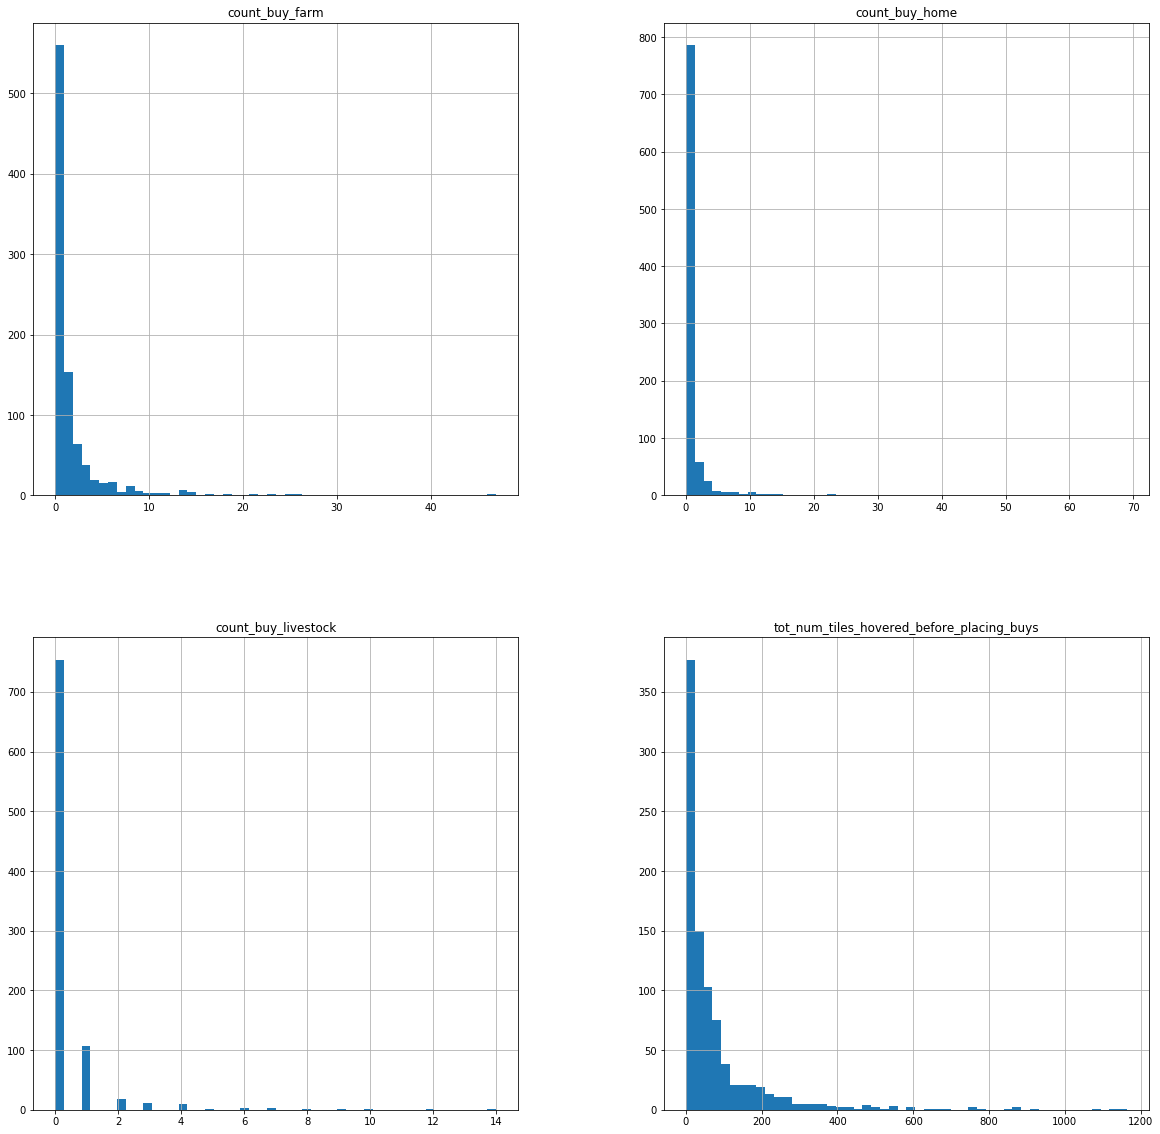

In [0]:
df3.hist(figsize=(20,20),bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa26cceedd8>,
      dtype=object)

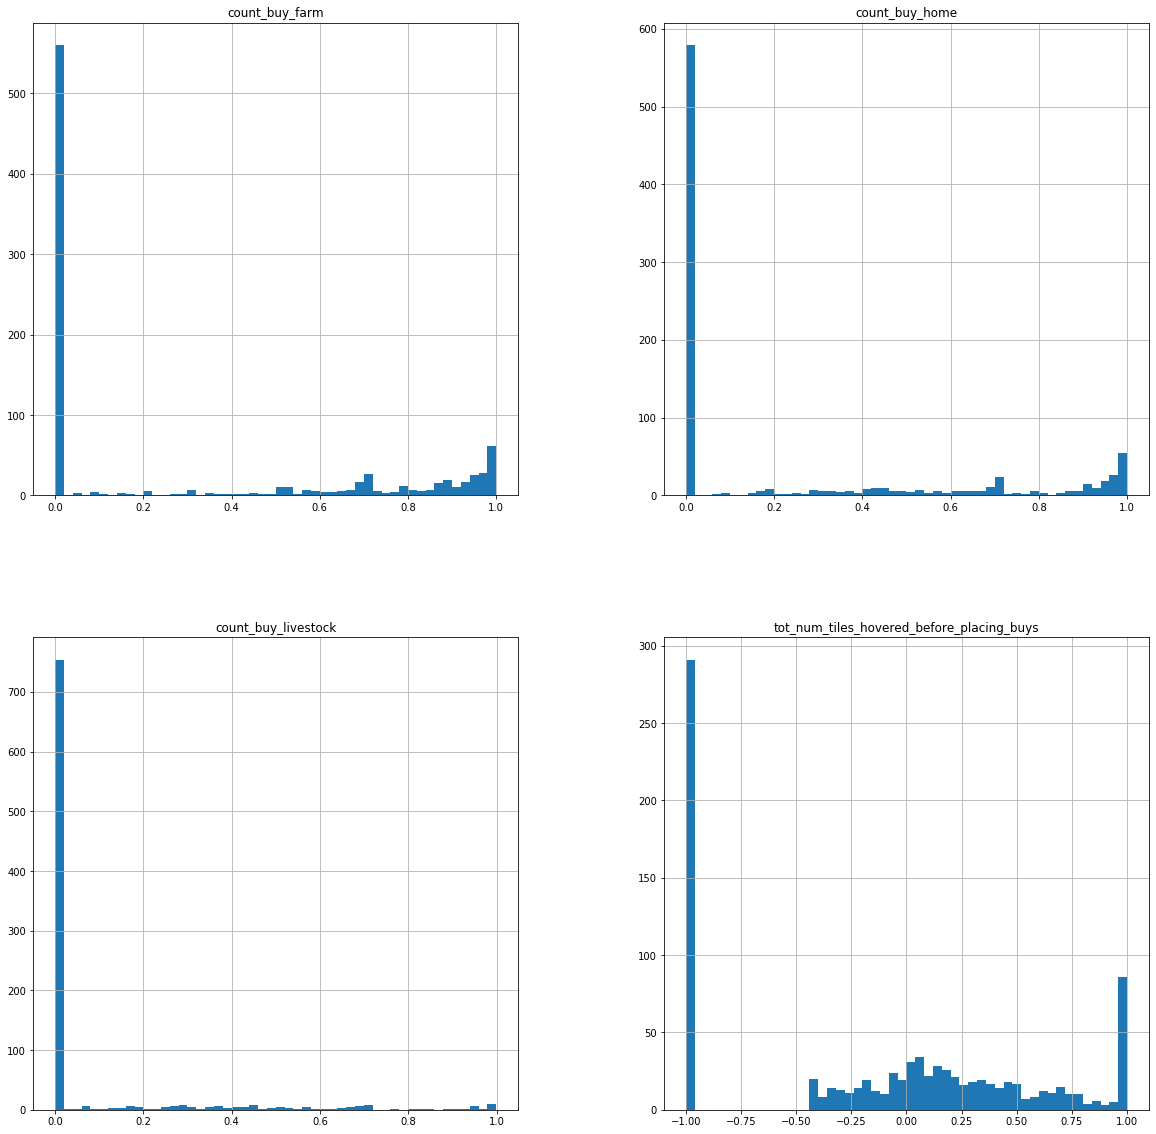

In [0]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

scale_normalize = make_pipeline(RobustScaler(), Normalizer())
X = scale_normalize.fit_transform(df3.to_numpy())
pd.DataFrame(X, columns = df3.columns).hist(figsize=(20,20),bins=50)

## Explore Eigenvalues via Scree Plot 

Text(0, 0.5, 'Eigenvalue')

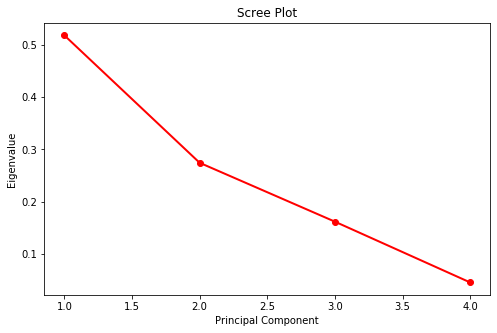

In [0]:
import numpy as np
U,S,V = np.linalg.svd(X)
eigvals = S**2 / np.sum(S**2)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(X.shape[1]) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

## Explore PCA and K-Means Error

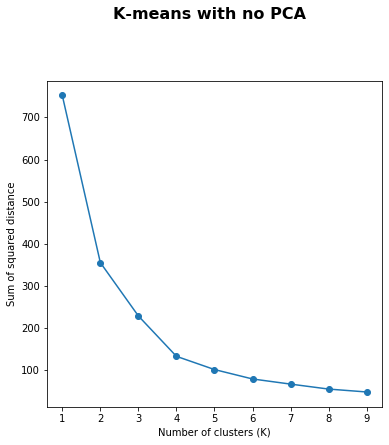

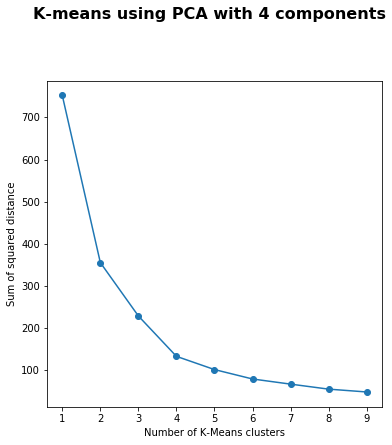

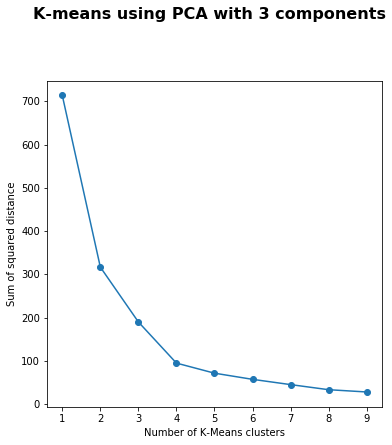

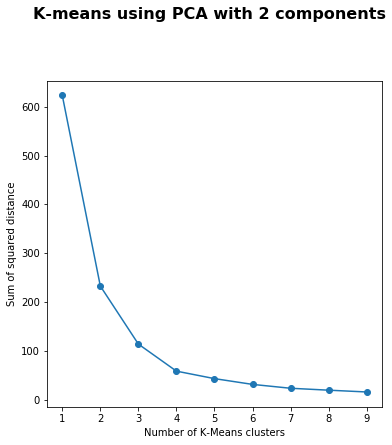

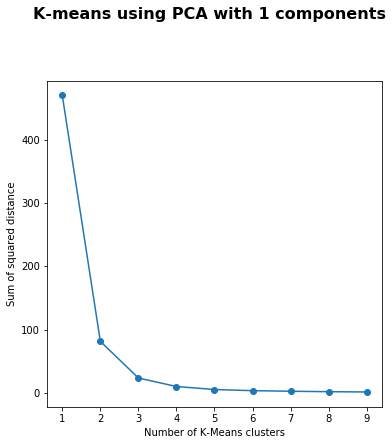

In [0]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.suptitle(f'K-means with no PCA',
                 fontsize=16, fontweight='semibold', y=1.05);
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distance');


for i, components in enumerate([4, 3, 2, 1]):
    # Project using PCA
    projected = PCA(components).fit_transform(X)
    sse = []
    list_k = list(range(1, 10))

    for k in list_k:
        km = KMeans(n_clusters = k)
        km.fit(projected)
        sse.append(km.inertia_)
    
    # Plot sse against k
    plt.figure(figsize=(6, 6))
    plt.plot(list_k, sse, '-o')
    plt.suptitle(f'K-means using PCA with {components} components',
                 fontsize=16, fontweight='semibold', y=1.05);
    plt.xlabel('Number of K-Means clusters')
    plt.ylabel('Sum of squared distance')


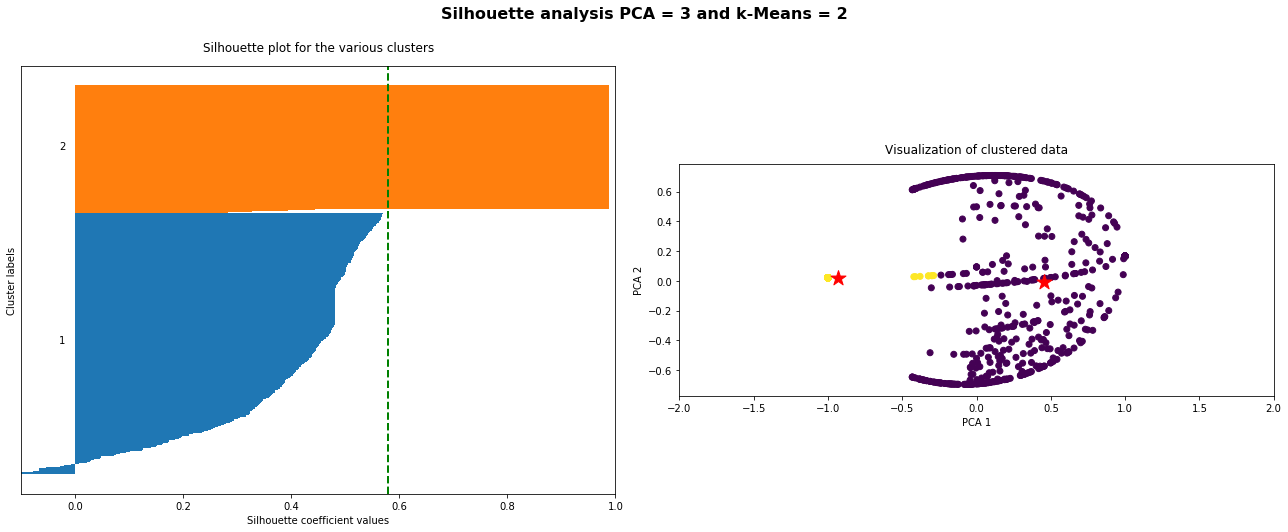

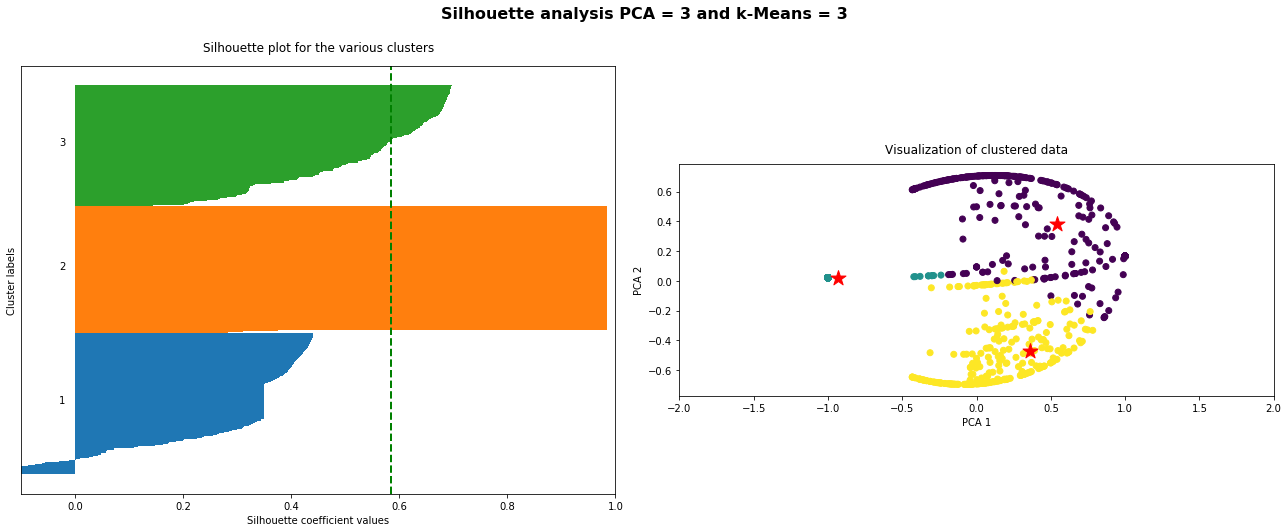

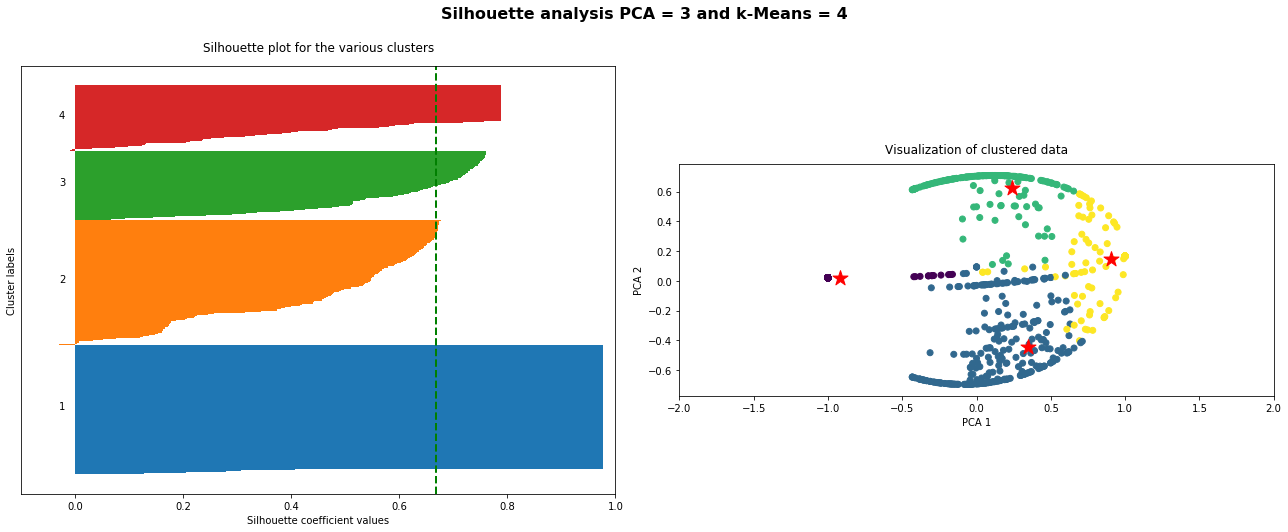

In [0]:
from sklearn.metrics import silhouette_samples

components = 3;
#projected = X
projected = PCA(components).fit_transform(X)


for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(projected)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(projected, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], projected[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('PCA 1')
    ax2.set_ylabel('PCA 2')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis PCA = {components} and k-Means = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

## Screwing with DBSCAN

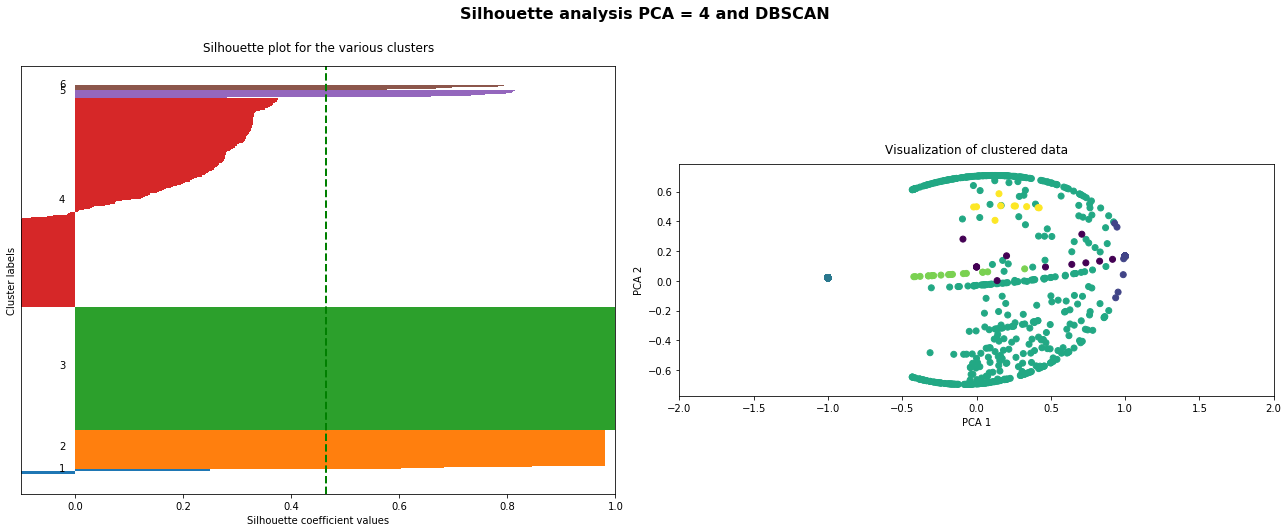

In [0]:
from sklearn.metrics import silhouette_samples

components = 4;
#projected = X
projected = PCA(components).fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Run the DBSCAN algorithm
db = DBSCAN(eps=0.3, min_samples=10)
labels = db.fit_predict(projected)


# Get silhouette samples
silhouette_vals = silhouette_samples(projected, labels)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

# Scatter plot of data colored with labels
ax2.scatter(X[:, 0], projected[:, 1], c=labels)
#ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
ax2.set_xlim([-2, 2])
ax2.set_xlim([-2, 2])
ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_title('Visualization of clustered data', y=1.02)
ax2.set_aspect('equal')

plt.tight_layout()
plt.suptitle(f'Silhouette analysis PCA = {components} and DBSCAN',
              fontsize=16, fontweight='semibold', y=1.05);


###John's Error Calculations

In [0]:
def calc_kmeans_errors(kmeans, X):
  errors = [0]*(kmeans.n_clusters)
  for r,l in zip(X, kmeans.labels_):
    errors[l] += np.linalg.norm(r-kmeans.cluster_centers_[l])
  return(sum(errors),sum(errors)/kmeans.n_clusters)
for nd in range(1,6):
  projected = PCA(nd).fit_transform(X)
  for k in range(2,11):
    print(f'nd={nd}, k={k}')
    kmeans = KMeans(k).fit(projected)
    print(f'error = {[x//1 for x in calc_kmeans_errors(kmeans,projected)]}')

nd=1, k=2
error = [203.0, 101.0]
nd=1, k=3
error = [104.0, 34.0]
nd=1, k=4
error = [67.0, 16.0]
nd=1, k=5
error = [48.0, 9.0]
nd=1, k=6
error = [37.0, 6.0]
nd=1, k=7
error = [32.0, 4.0]
nd=1, k=8
error = [26.0, 3.0]
nd=1, k=9
error = [21.0, 2.0]
nd=1, k=10
error = [18.0, 1.0]
nd=2, k=2
error = [373.0, 186.0]
nd=2, k=3
error = [250.0, 83.0]
nd=2, k=4
error = [171.0, 42.0]
nd=2, k=5
error = [144.0, 28.0]
nd=2, k=6
error = [121.0, 20.0]
nd=2, k=7
error = [106.0, 15.0]
nd=2, k=8
error = [96.0, 12.0]
nd=2, k=9
error = [86.0, 9.0]
nd=2, k=10
error = [77.0, 7.0]
nd=3, k=2
error = [434.0, 217.0]
nd=3, k=3
error = [323.0, 107.0]
nd=3, k=4
error = [228.0, 57.0]
nd=3, k=5
error = [189.0, 37.0]
nd=3, k=6
error = [166.0, 27.0]
nd=3, k=7
error = [145.0, 20.0]
nd=3, k=8
error = [125.0, 15.0]
nd=3, k=9
error = [114.0, 12.0]
nd=3, k=10
error = [103.0, 10.0]
nd=4, k=2
error = [465.0, 232.0]
nd=4, k=3
error = [360.0, 120.0]
nd=4, k=4
error = [264.0, 66.0]
nd=4, k=5
error = [229.0, 45.0]
nd=4, k=6
error =

ValueError: ignored

###Plot the PCA and K-Means

In [0]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
pca = PCA(n_components=3)
projected = pca.fit_transform(X)
kmeans = KMeans(1).fit(projected)
intent_labels=kmeans.labels_
ax.scatter3D(projected[:,0], projected[:,1], projected[:,2], c=kmeans.labels_);

Begin using Factor Analysis

In [0]:
from sklearn.decomposition import FactorAnalysis
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
transformer = FactorAnalysis(n_components=3, random_state=0)
projected = transformer.fit_transform(X)
kmeans = KMeans(5).fit(projected)
intent_labels=kmeans.labels_
ax.scatter3D(projected[:,0], projected[:,1], projected[:,2], c=kmeans.labels_);

In [0]:
def calc_kmeans_errors(kmeans, X):
  errors = [0]*(kmeans.n_clusters)
  for r,l in zip(X, kmeans.labels_):
    errors[l] += np.linalg.norm(r-kmeans.cluster_centers_[l])
  return(sum(errors),sum(errors)/kmeans.n_clusters)
for nd in range(1,6):
  projected = FactorAnalysis(nd, random_state=0).fit_transform(X)
  for k in range(2,6):
    print(f'nd={nd}, k={k}')
    kmeans = KMeans(k).fit(projected)
    print(f'error = {[x//1 for x in calc_kmeans_errors(kmeans,projected)]}')

In [0]:
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')